In [2]:
# 데이터 로드 및 확인
import numpy as np
import pandas as pd 

health_df = pd.read_csv('./data/gym_churn_us.csv')

health_df.describe()

# 결측 확인
health_df.isna().sum()


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_12712\853241804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Temp\ipykernel_12712\853241804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Temp\ipykernel_12712\853241804.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Tem

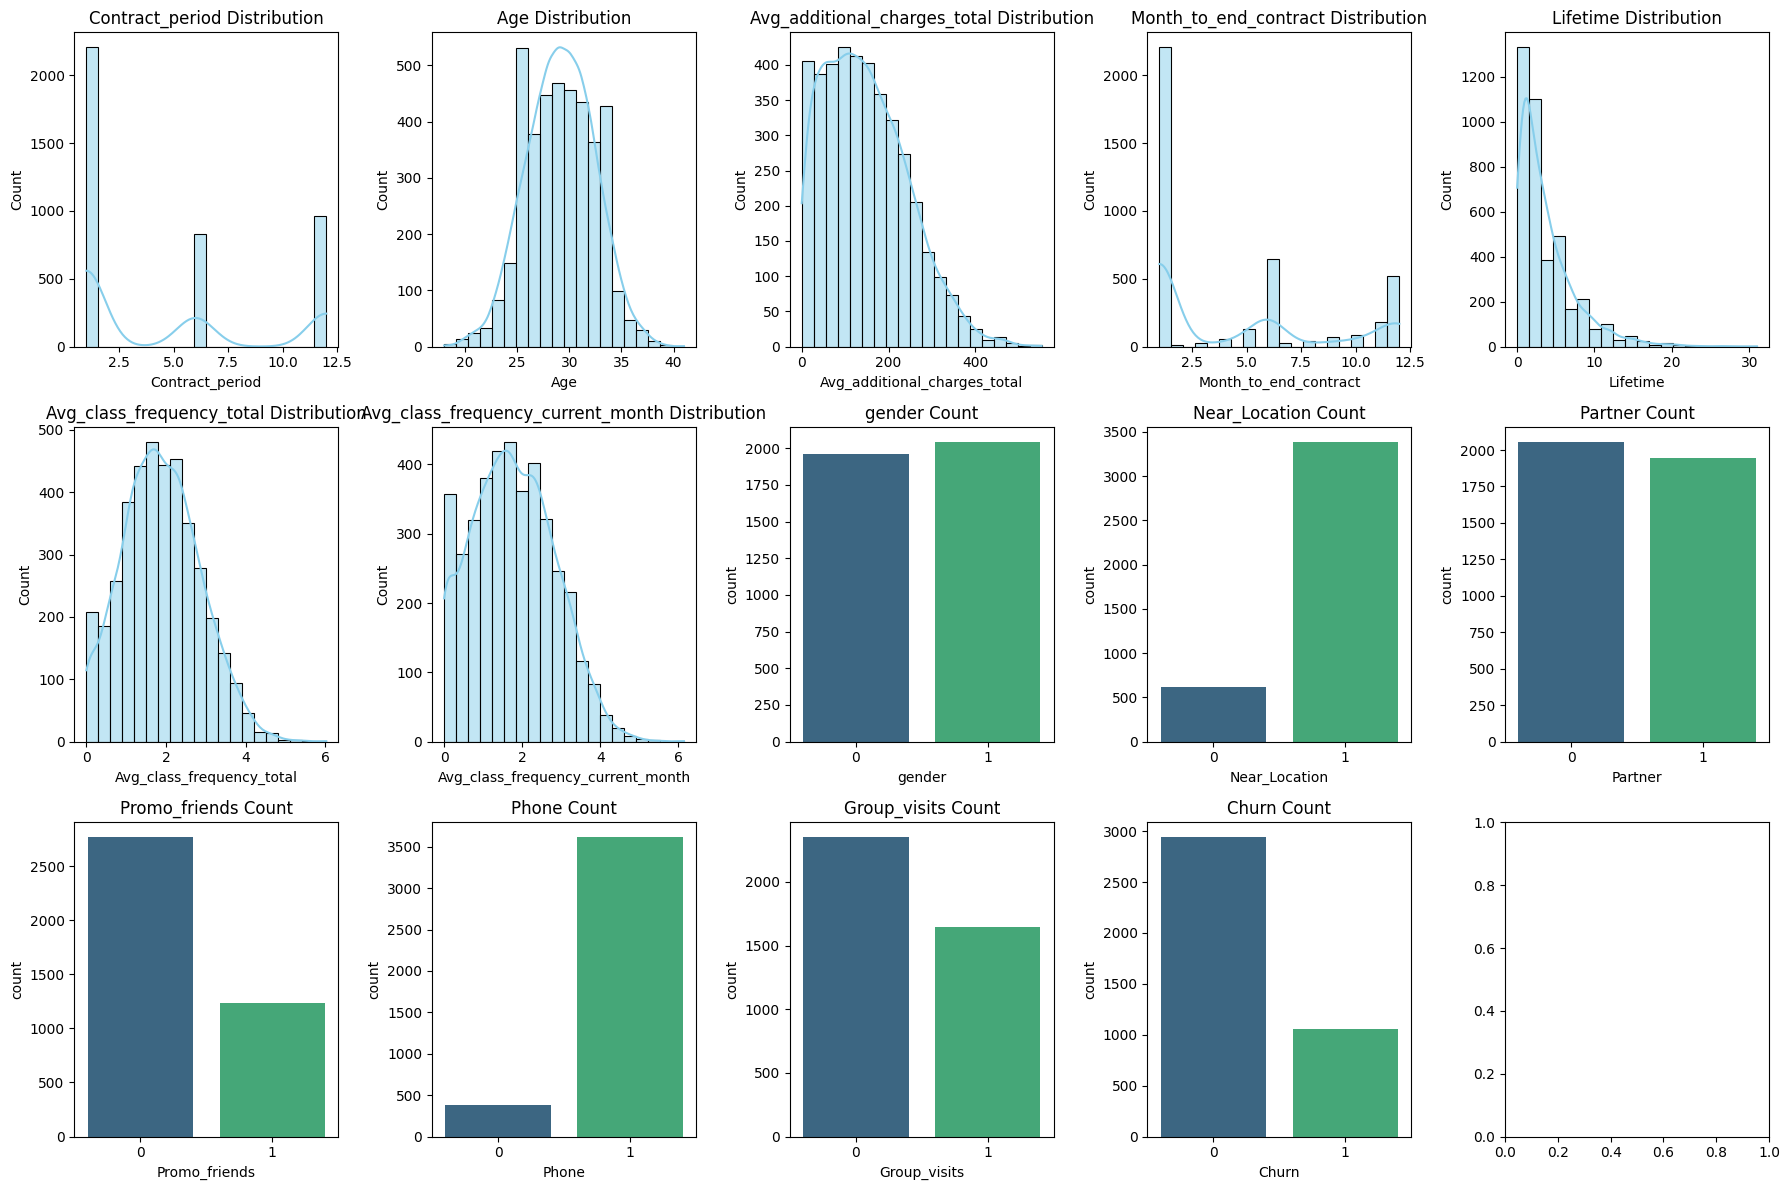

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

df = health_df

fig, axes = plt.subplots(3, 5, figsize=(18, 12))  

numeric_columns = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                   'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, color='skyblue', bins=20, ax=axes[i//5, i%5])  # 3x5 배치에 맞게 위치
    axes[i//5, i%5].set_title(f'{column} Distribution')

categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']

for i, column in enumerate(categorical_columns, len(numeric_columns)):
    sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])  
    axes[i//5, i%5].set_title(f'{column} Count')

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12712\1644627814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette='Set2', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Temp\ipykernel_12712\1644627814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette='Set2', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Temp\ipykernel_12712\1644627814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette='Set2', ax=axes[i//5, i%5])
C:\Users\USER\AppData\Local\Temp\ipykernel_

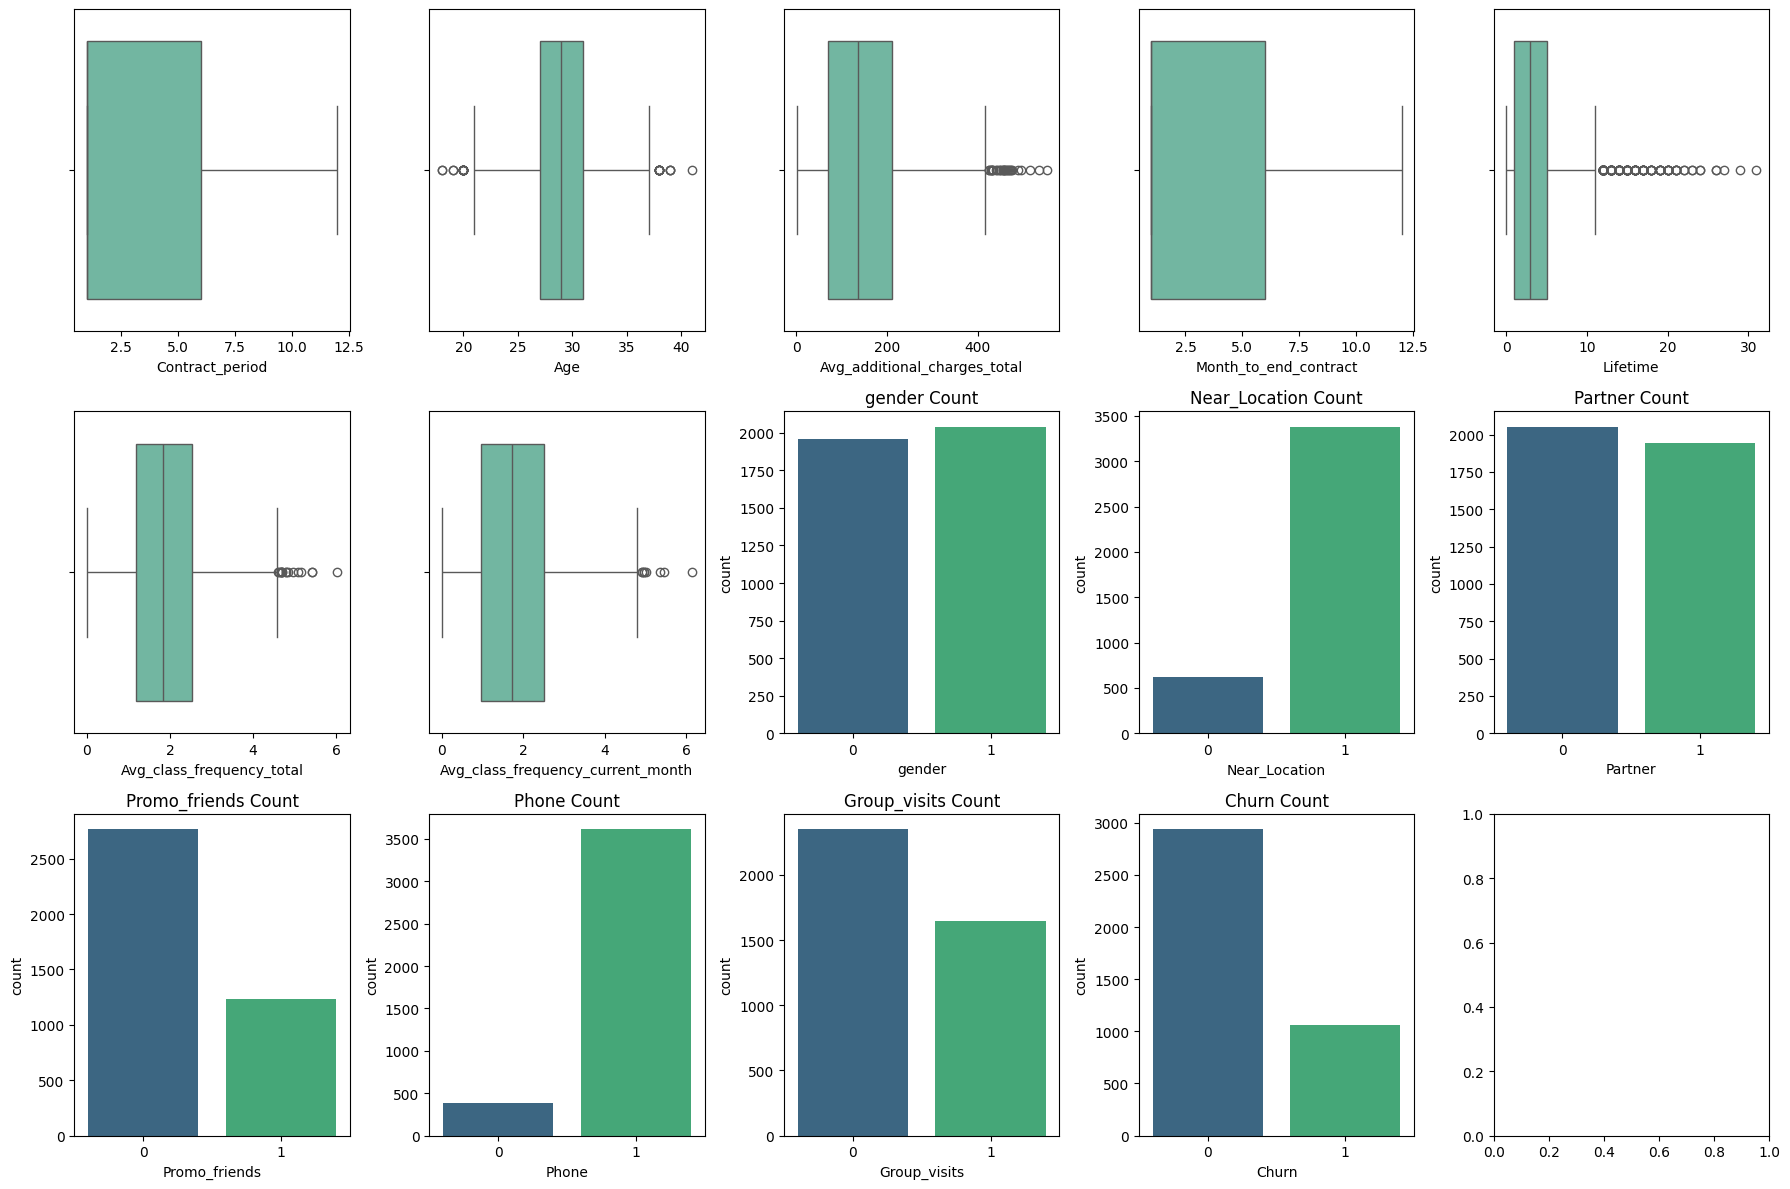

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df = health_df


fig, axes = plt.subplots(3, 5, figsize=(18, 12))

numeric_columns = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                   'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, palette='Set2', ax=axes[i//5, i%5])  

categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']

for i, column in enumerate(categorical_columns, len(numeric_columns)):
    sns.countplot(data=df, x=column, palette='viridis', ax=axes[i//5, i%5])  
    axes[i//5, i%5].set_title(f'{column} Count')

plt.tight_layout()
plt.show()


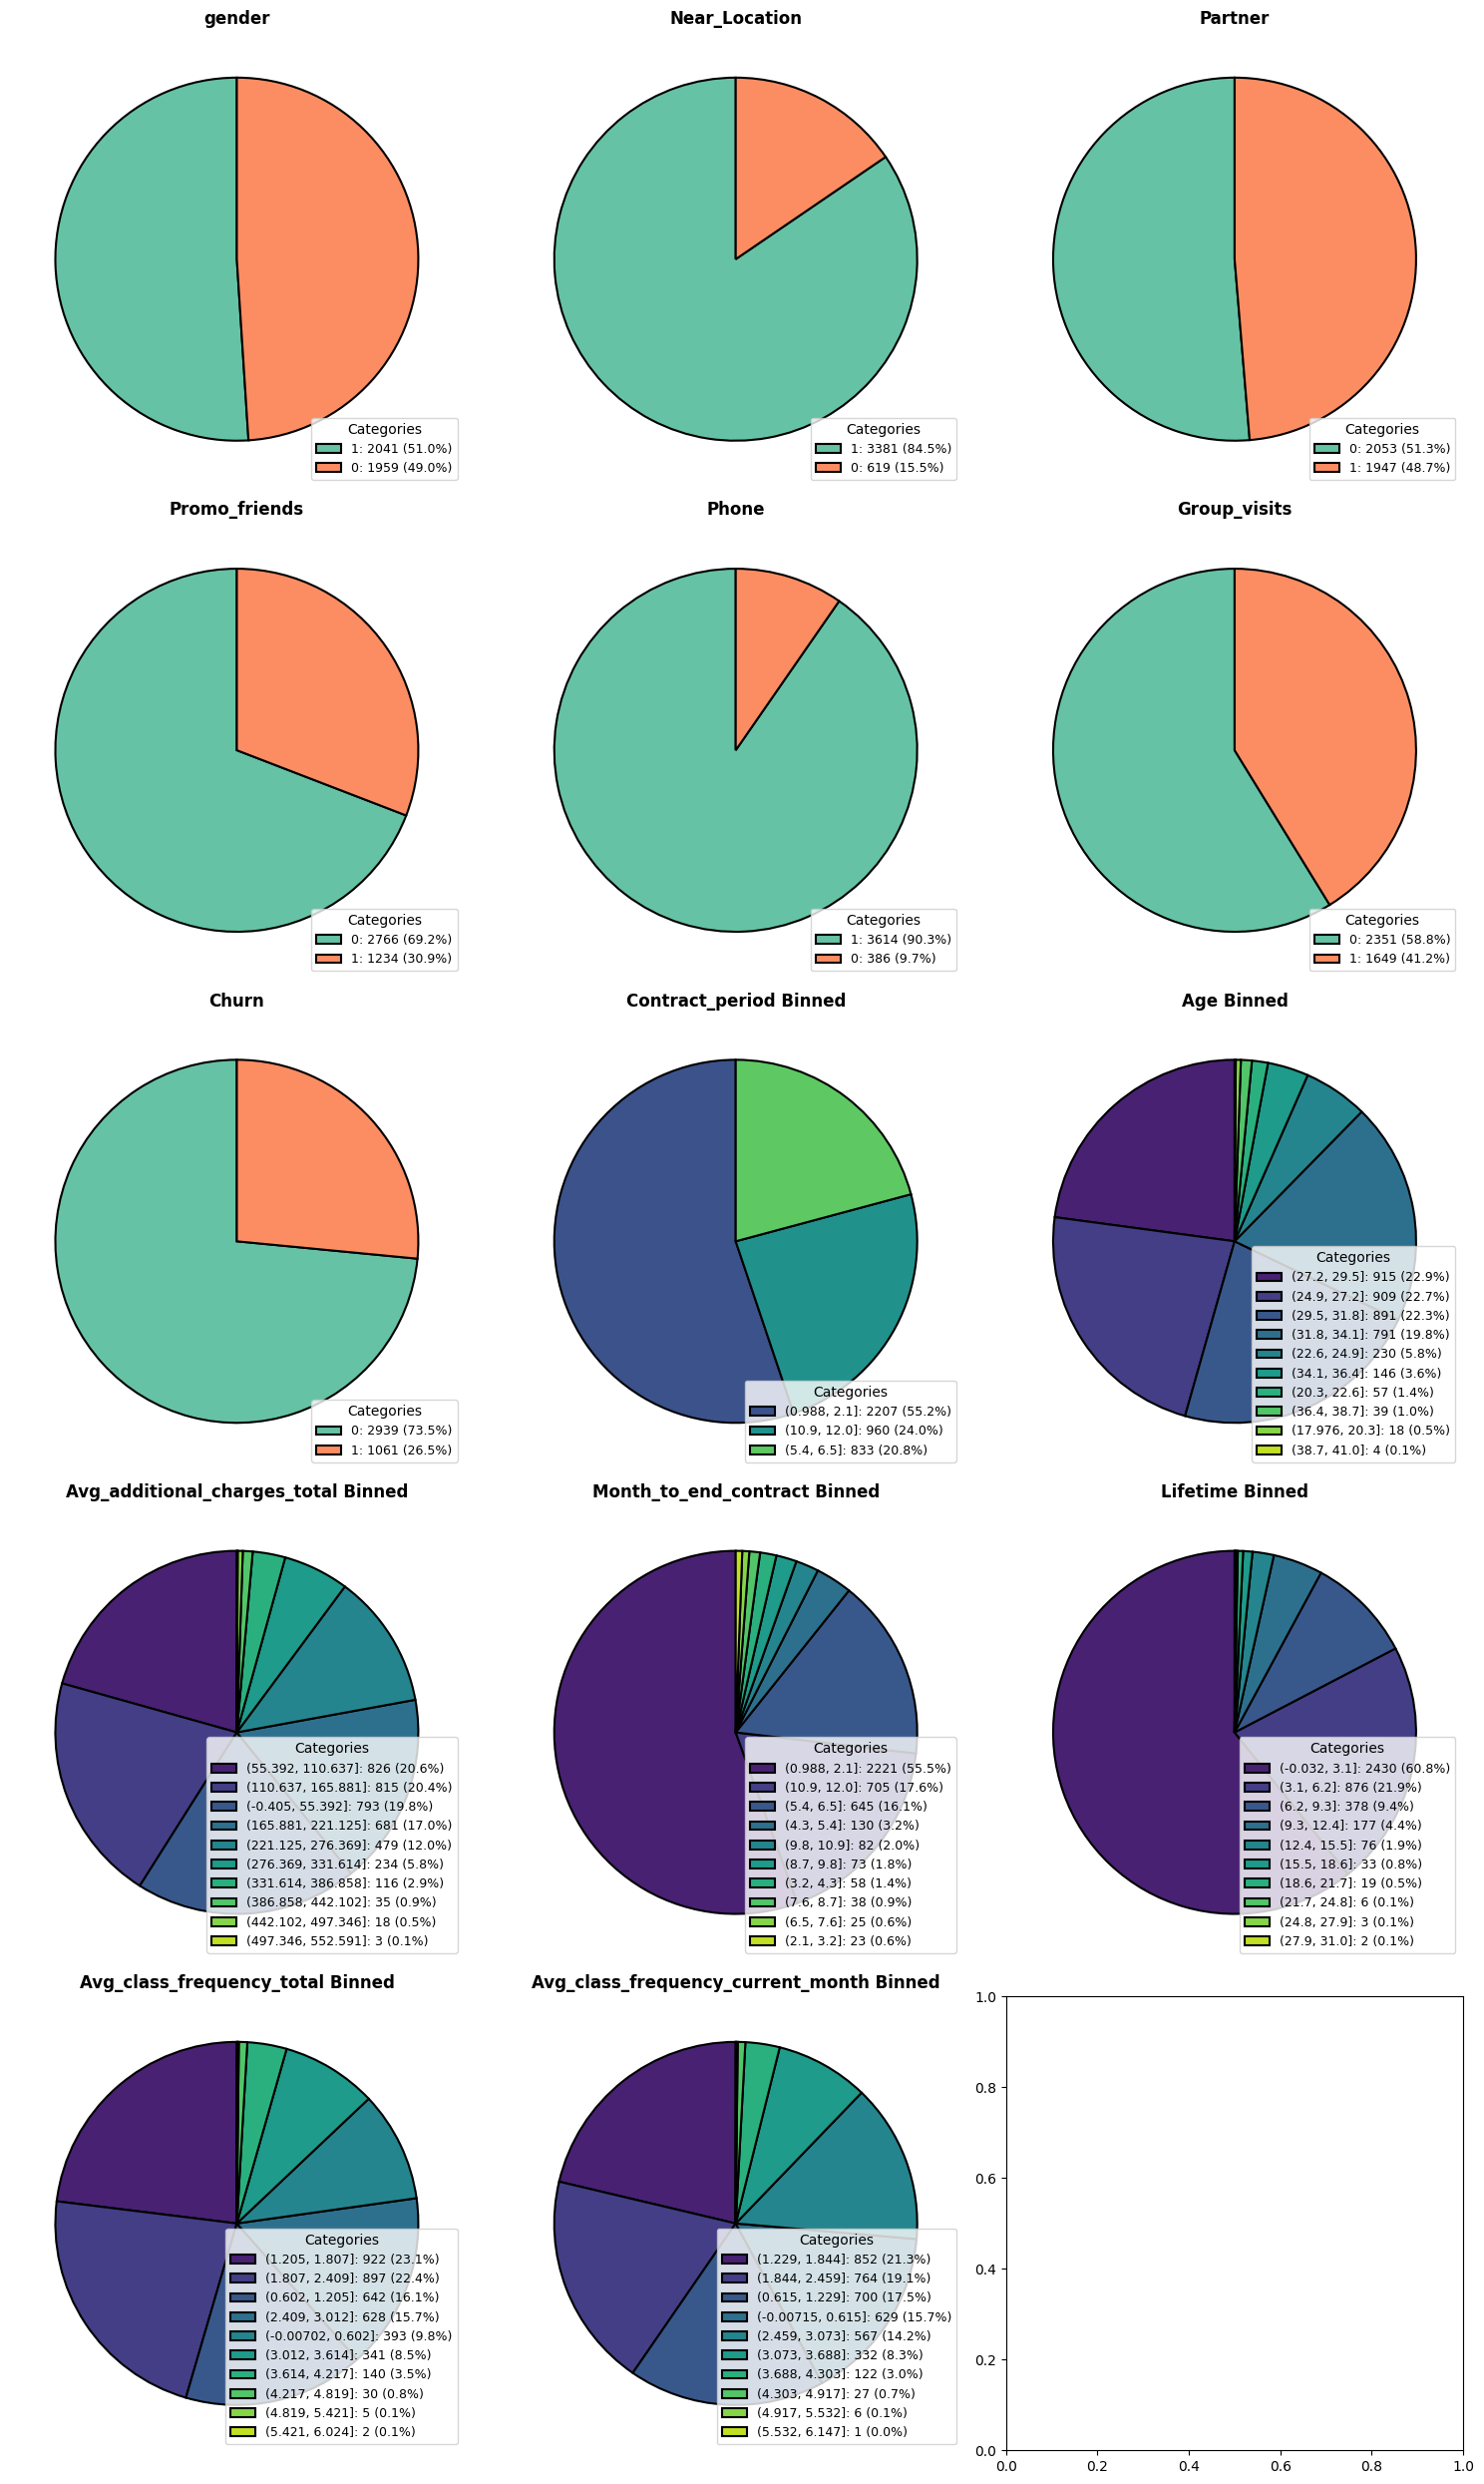

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  

df = health_df

categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
numeric_columns = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                   'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

total_columns = len(categorical_columns) + len(numeric_columns)

rows = (total_columns // 3) + (total_columns % 3 > 0)  
cols = 3 

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows)) 

for idx, column in enumerate(categorical_columns):
    row, col = divmod(idx, cols)  
    categorical_values = df[column].value_counts()  
    
    non_zero_values = categorical_values[categorical_values > 0]
    
    wedges, texts = axes[row, col].pie(non_zero_values, 
                                       startangle=90, 
                                       colors=sns.color_palette("Set2", len(non_zero_values)),
                                       wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    axes[row, col].set_title(f'{column}', fontsize=12, fontweight='bold')  
    
    legend_labels = [f'{label}: {value} ({percent:.1f}%)' 
                     for label, value, percent in zip(non_zero_values.index, non_zero_values, 
                                                      100 * non_zero_values / non_zero_values.sum())]
    
    axes[row, col].legend(legend_labels, loc='lower right', fontsize=9, title="Categories", title_fontsize=10)

for idx, column in enumerate(numeric_columns, len(categorical_columns)):
    row, col = divmod(idx, cols)  

    binned_values = pd.cut(df[column], bins=10, include_lowest=True).value_counts() 
    
    non_zero_binned_values = binned_values[binned_values > 0]
    
    wedges, texts = axes[row, col].pie(non_zero_binned_values, 
                                       startangle=90, 
                                       colors=sns.color_palette("viridis", len(non_zero_binned_values)),
                                       wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    axes[row, col].set_title(f'{column} Binned', fontsize=12, fontweight='bold') 
    
    legend_labels = [f'{label}: {value} ({percent:.1f}%)' 
                     for label, value, percent in zip(non_zero_binned_values.index, non_zero_binned_values, 
                                                      100 * non_zero_binned_values / non_zero_binned_values.sum())]
    
    axes[row, col].legend(legend_labels, loc='lower right', fontsize=9, title="Categories", title_fontsize=10)

plt.tight_layout()
plt.show()
